# Final assignment of “Management and Analysis of Physics Datasets”- Part 2

## Fun Exercise  
You might have seen this kind of puzzles on social media. It should be straight-forward for you to understand which operations connect the two numbers  before the '=' sign. What is the result of the $\boldsymbol{?}$ field? Show proof for each line!

$$\begin{align}& 1 + 2 = 3 \\ & 2 + 3 = 5 \\ & 3 + 7 = 4 \\ & 4 + 5 = \space\boldsymbol{?} \\ & 5 + 9 = 12\end{align}$$

## 1 Redundancy
We  are  programming  a  file  based  RAID-4  software  algorithm.  For  this purpose  we  are  converting  a  single  input  (**raid4.input**)  file  into  four  data files ```raid4.0,raid4.1,raid4.2,raid4.3 ```   and  one  parity  file  ```raid4.4``` -  the four data and one parity file we call ‘stripe files’. 

The input file can be downloaded from: 
http://apeters.web.cern.ch/apeters/pd2021/raid4.input

To do this we are reading in a loop sequentially blocks of four bytes from the input file until the whole file is read:
* in  each  loop  we  write  one  of  the  four  read  bytes  round-robin  to  each  data  file, compute  the  parity  of  the  four  input  bytes  and  write  the  result  into  the  fifth parity file.  ( see the drawing for better understanding ) 

* we continue until all input data has been read. If the last bytes read from the input file  are  not  filling  four  bytes,  we  consider  the  missing  bytes  as  zero  for  the  parity computation.

#### Input File (horizontal)
**raid4.input - total size 170619 bytes**<br>
(number in cell = byte offset in file)

| 0 | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | 10 | 11 | 12 | ... | ... | 170618 | 
|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|

#### Output File (vertical)
(number in cell = byte offset in file, p0,1,2... are the row-wise parities)

| raid4.0 | raid4.1 | raid4.2 | raid4.3 | raid4.4 |
|---|---|---|---|---|
| 0 | 1 | 2 | 3 | p0 |
| 4 | 5 | 6 | 7 | p1 |
| 8 | 9 | 10 | 11 | p2 |
| 12 | 13 | 14 | 15 | p3 |
| ... | ... | ... | ... | ... |

#### Stripe parity
(column wise parity)

| q0=0^4^8^12 | q1 | q2 | q3 | q4 |
|---|---|---|---|---|

### 1.1 Write a program (C,C++, R or Python), which produces four striped data and one parity file as described above using the given input file. 
**hint:** if you have a problem programming this yourself, you can download the core program in C++ from http://apeters.web.cern.ch/apeters/pd2021/raid4.cSee the explanations in the beginning how to compile and run it. You have to add the parity computations at the IMPLEMENT THIS sections! If you can’t compile or run it, you can still fill in the missing implementation! 

### 1.2 Extend the program to compute additionally the parity of all bytes within one stripe file. 
You can say, that the computed column-wise parity acts as a ________  for each stripe file. Compute the size overhead by comparing the size of all 5 stripe files with the original file.  The size overhead is ________ % !

### 1.3 What is the 5-byte parity value if you write it it in hexadecimal format like $P^5$  =0x[q0][q1][q2][q3][q4], where the [qx] are the hexadecimal parity bytes computed by xor-ing all bytes in each stripe file.  
A byte in hexadecimal has two digits and you should add leading 0 if necessary.<br> 
Examples:
* a byte with contents 1 in hexadecimal is 0x01. A byte with contents 255in hexadecimal is 0xff.
* a possible 5-byte parity would be P5 = 0 x 01 0c 1a 2f 3e

### 1.4 If you create a sixth stripe file, which contains the row-wise parities of the five stripe files, what would be the contents of this file? 

Write down the equation for R, which is the XOR between all data stripes D0,D1,D2,D3 and the parity P. Remember P was the parity of D0,D1,D2,D3! Reduce the equation removing P from it to get the answer about the contents! 

### 1.5 After some time you recompute the 5-byte parity value as in 1.3. Now the result is $P^5$ = 0x a5 07 a0 01 9e. Something has been corrupted. You want to reconstruct the original file raid4.input using the 5 stripe files.
Describe how you can recreate the original data file. Which stripe files do you use and how do you recreate the original data file with the correct size? 

## 2 Cryptography
The Caesar cipher is named for Julius Caesar, who used an alphabet where decrypting would shift three letters to the left. A friend has emailed you the following text: K]amua!trgpyShe told you that her encryption algorithm works similar to the Caesar cipher:
* to  each ASCI  value  of  each  letter  I  add  a  secret keyvalue.  (note that ASCII values range from 0 to 255) 
* additionally  to  make  it  more  secure  I  add  a  variable  (so  called) noncevalue to each ASCII number.

The nonce start value is 5 for the first character of the message. For each following character add 1 to the nonce of the previous character, e.g. for the second letter the nonce added is 6, for the third letter it is 7 aso. 

### 2.1 Is this symmetric or asymmetric encryption and explain why?

### 2.2 Write a small brute force program which tests keys from 0..255 and use a dictionary approach to figure out the original message. 
In Python you can use the ord() function to get an integer representation of a character and the chr() to retrieve a character string from an integer!

What is the decryption algorithm/formula to be used?

The used key is _____ , the original message text is ____________ ! 

## Object Storage
In an object storage system we are mapping objects by name to locations using a hash table.  Imagine we have a system with ten hard disks (10 locations). We enumerate the location of a file using an index of the hard disk [0..9].

<img src="https://i.ibb.co/dPLWgCs/Screenshot-at-2021-06-02-20-43-04.png" width="800" height="600"/>

Our hash algorithm for placement produces hashes, which are distributed uniform over the value space for a flat input key distribution.  

We want now to simulate the behaviour of our hash algorithmwithout the need to actually compute any hash value.

Instead  of  using  real  filenames,  which  we  would  hash  and  map  using  a hash  table  to  a  location  (as  we  did  in  the  exercise),  we  are  ‘computing’  a location for ‘any’ file by generating a random number for the location in  the  range  [0..9]  to  assign  a  file  location.  To  place  a  file  in  the  storage system  we  use  this  random  location  where  the  file  will  be  stored  and consumes space. 

Assume each disk has 1TB of space, we have 10TB in total.

Place as many files of 10GB size as possible to hard disks choosing random locations until one hard disk is full. <br> **Hint:** a hard disk is full once you have stored hundred 10GB files.

### 3.1Write a program in Python, R or using ROOT, which simulates the placement of 10GB files to random locations and account the used space on each hard disk. Once the first hard disk is full, you stop to place files.

Remark: the distribution changes every time if the random generator is not seeded always with the same start value. Nevertheless both ways are accepted! 

Possibly visualise the distribution similar to the histogram above.

In [161]:
a = np.random.choice(range(123),10)
set(np.unique(a)).union(range(123))
def replace(a,b,i):
    a[i] = b
[replace(a,10,i) for i in range(4)]
a*=1000
a.sum()

297000

In [176]:
import random
import matplotlib.pyplot as plt
import numpy as np
random.seed(1234)
choose = np.random.choice

def replace(a,b,i):
    a[i] = b

def place_files(N_disks, disk_size, file_size, file_count = True):
    # Initially available space
    free_space = np.repeat(disk_size,N_disks)

    # No file has been placed yet
    placed_files = 0

    while np.all(free_space >= file_size):
        # What is the smallest space available?
        min_free = free_space.min()

        # How many more files can we fill it with?
        max_files = min_free//file_size
        print(max_files)

        # Generate an array for random placement of that many files
        placings = choose(range(N_disks),max_files)

        # Count how many files will be added to each disk
        keys, counts = np.unique(placings, return_counts=True)

        # Rebuild counts array, in case not all disks are present
        d_used = np.zeros(N_disks,dtype = np.int64)
        [replace(d_used,c,i) for i,c in zip(keys,counts)]#TODO: use a more numpythonic way

        # How much more storage will be used in each disk?
        d_used *= file_size

        # How much space is left now?
        free_space -= d_used

        # How many files have been placed in total?
        placed_files += counts.sum()

    #TODO: exceptional case to avoid loop. e. g. file size is 0.
    if file_count: return free_space, placed_files
    # If file count is not requested, then we care about the used space
    used_space = N_disks*disk_size - sum(free_space)
    return used_space


def plot_usage(disk_size,free_space):
    N_disks = len(free_space)
    used = [(disk_size - f)/1024 for f in free_space]
    plt.bar(range(N_disks),used, width = 0.98, tick_label = range(N_disks), color = 'gray')
    plt.title('Used space on each disk')
    plt.xlabel('harddisk')
    plt.ylabel('Used [GB]')
    plt.show()



102
85
76
66
54
47
41
40
35
33
31
28
26
21
17
14
14
14
14
14
13
12
12
10
9
8
7
6
6
4
4
1
1
1


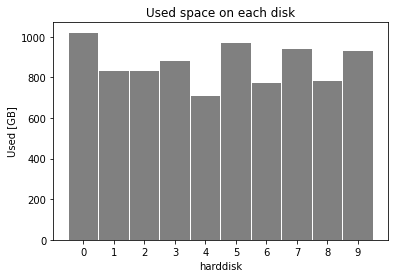

In [177]:
N_disks = 10; disk_size = 1024*1024 # ten 1TB = 1048576MB disks
file_size = 10*1024 # 10GB files

free_space, placed_files = place_files(N_disks,disk_size,file_size)

plot_usage(disk_size,free_space)

### 3.1a How many files did you manage to place?

In [178]:
print(f'{placed_files} files were successfully placed.')

866 files were successfully placed.


### 3.1b What is the percentage of total used space on all hard disks in the moment the first disk is full?

In [179]:
total_space = N_disks*disk_size
used_percentage = 100*(total_space-sum(free_space))/total_space
print(f'{round(used_percentage,2)}% of the total available space was used.')

84.57% of the total available space was used.


### 3.2 Repeat the same task placing 1GB files until the first hard disk is full.

1024
911
818
720
647
576
517
470
420
374
340
304
275
242
210
190
170
147
138
123
111
103
89
79
72
64
59
54
48
41
38
33
26
22
19
17
17
15
14
14
13
13
11
9
9
7
6
4
4
2
2
2
2
2
2
2
2
2
2
2
1
1
1
1
1
1
1


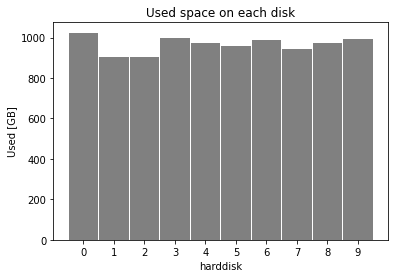

In [180]:
file_size = 1024 # 1GB files
free_space, placed_files = place_files(N_disks,disk_size,file_size)
plot_usage(disk_size,free_space)

### 3.2a How many files did you manage to place?

In [181]:
print(f'{placed_files} files were successfully placed.')

9656 files were successfully placed.


### 3.2b What is the percentage of total used space on all hard disks in the moment the first disk is full? 

In [182]:
total_space = N_disks*disk_size
used_percentage = 100*(total_space-sum(free_space))/total_space
print(f'{round(used_percentage,2)}% of the total available space was used.')

94.3% of the total available space was used.


### 3.3 Based on this observation: why do you think object storage typically stores fixed size blocks of 4M and not files of GBs size as a whole? (so called block storage approach) 

Run the same program for 4M block sizes and demonstrate the benefits

### SOLUTION
To begin with, as the file size is smaller, a bigger fraction of the fullest disk can be used before stopping.
Assuming each disk has the same probability of being used, as is the premise for the current simulation, and since, when using smaller blocks, more files are generated. More files means a larger number of events $N$. As $N$ increases, a more evenly distributed placement of files is expected, therefore being able to use a larger fraction of the total space before having to stop.

262144
235688
212099
190697
171601
154188
138803
125018
112329
101114
91026
81839
73515
66178
59536
53696
48303
43430
39170
35354
31868
28678
25821
23166
20840
18796
16903
15166
13608
12243
11065
9908
8872
8013
7175
6386
5762
5151
4691
4248
3804
3408
3074
2743
2485
2247
2033
1808
1628
1445
1294
1168
1044
943
842
762
685
616
558
502
455
403
368
318
298
270
248
215
196
173
158
138
130
113
105
101
94
87
79
69
57
52
48
47
42
38
33
32
28
23
20
19
18
17
17
16
14
11
10
9
9
9
8
8
7
7
5
3
3
2
2
2
2
2
1
1
1
2611818 files were successfully placed.
99.63% of the total available space was used.


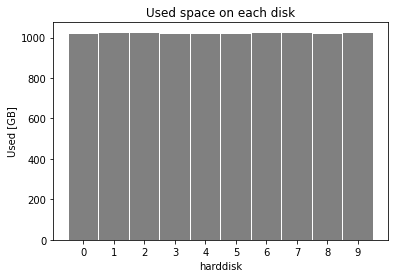

In [183]:
file_size = 4 # 4MB files
free_space, placed_files = place_files(N_disks,disk_size,file_size)
print(f'{placed_files} files were successfully placed.')
total_space = N_disks*disk_size
used_percentage = 100*(total_space-sum(free_space))/total_space
print(f'{round(used_percentage,2)}% of the total available space was used.')
plot_usage(disk_size,free_space)

### 3.4. Compute the average used space on all hard disks and the standard deviation for the average used space for 10 GB and 1GB and 4M files. How is the standard deviation correlated to the block size and why?  If we now repeat such an experiment for many more (thousands) of hard disks, which kind of distribution do you get when you do a histogram of the used space of all hard disks?

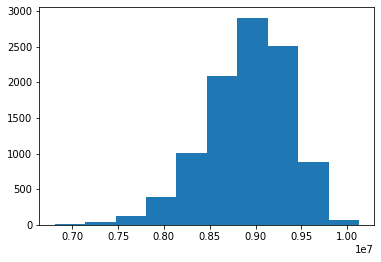

In [175]:
N_disks = 10; disk_size = 1024*1024 # ten 1TB = 1048576MB disks
file_size = 10*1024 # 10GB files
simulate = lambda N: [place_files(N_disks,disk_size,file_size,file_count=False) for _ in range(N)]
sims = simulate(10000)
plt.hist(sims)
plt.show()

## 4 Rest APIs & Block Chain Technology 

Under https://pansophy.app:8443 you find a Crypto Coin Server exporting a simple Block Chain.

You can open this URL in any web browser to see the current Block Chain status and the account information. At the time of writing the initial birth account of the Block Chain contained 1M coins ( “genesis” : 1000000 ) : 

<img src="https://i.ibb.co/nPNksZt/Screenshot-at-2021-06-02-21-01-56.png" width="800" height="600"/>

The REST responses are given in JSON format. Our REST API uses secure HTTP protocol and it is based on two HTTP methods: GET POST GET requests are used, to retrieve any kind of information, POST requests are used to change state in the server. 

The task is to implement a client and use a simple REST API to submit transactions to the Block Chain. Your goal is to book coins from other people’s accounts to your own account.  The server implements a Proof Of Time algorithm. To add a transaction to move coins to your account, you have to submit a merit request and you have to let time pass before you can send a claim request to execute your transaction on the Block Chain. If you claim your transaction too fast after a merit request, your request is discarded. The server enforces a Proof Of Time of a minimum of 10 seconds!

(I didn't add the documentation, seems useless to report it here)

### 4.1.1 Use the REST API  and the curl command to transfer coins of the genesis or any other account on your own team account. 
You can use the -d option to POST a document. You have to indicate in your request, that the content type of the document is JSON. To do this you can add an HTTP header for this command  
```curl ... -H”Content-Type: application/json” ...```

If you prefer, you can use a Python program, doing the same HTTPS requests respecting Proof of Time.If you want to have some more fun, you can also load the current state into your Python script using GET requests and programatically steal from accounts which are reported. Be aware, that you can never steal the last coin of an account and if at the time of a claim there are not enough coins left on an account, your transaction is discarded.

To you will have to add at least one successful transaction to the Block Chain. 

### 4.1.2 What is the maximum number of transactions one given team can add to the Block Chain in one day? 

### 4.2 The server has a function to compute a hash of a block in the Block Chain: 
<img src="https://i.ibb.co/Lnr32nS/Screenshot-at-2021-06-02-21-01-28.png" width="800" height="600"/>

### 4.2.1 Explain what this function does and why is this ‘the key’ for Block Chain technology? 

### 4.2.2 If you have the knowledge of the hash function, how can you validate the contents of the Block Chain you received using a GET request to make sure, nobody has tampered with it? You don’t need to implement it! Explain the algorithm to validate a Block Chain!

### 4.2.3 Why might the GET REST API run into scalability problems? 
Express the scalability behaviour of execution times of GET and POST requests in Big O notation in relation to the number of transactions recorded in the Block Chain! Draw execution time vs transactions for GET and POST requests. 

### 4.2.4 If the Crypto server goes down, the way it is implemented it loses the current account balances. How can the server recompute the account balances after a restart from the saved Block Chain? 

### 4.2.5 What are the advantages of using a REST API and JSON in a client-server architecture? What are possible disadvantages? 